#### Import of Libraries

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [259]:
df = pd.read_csv('datasets/ilpd/ilpd.csv')
#df_cd = pd.merge(df["at1"],df["height"], how='inner',left_on=None)
#df.to_csv('page_blocks_edited.csv', index=False)
#df=df.drop(columns=["id"])
df=df.replace("Female",0)
df=df.replace("Male",1)
df=df.dropna(axis=0, how="any")

In [260]:
df.head(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB Albumin,AGRatio,Class
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [261]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          579 non-null    int64  
 1   Gender       579 non-null    int64  
 2   TB           579 non-null    float64
 3   DB           579 non-null    float64
 4   Alkphos      579 non-null    int64  
 5   Sgpt         579 non-null    int64  
 6   Sgot         579 non-null    int64  
 7   TP           579 non-null    float64
 8   ALB Albumin  579 non-null    float64
 9   AGRatio      579 non-null    float64
 10  Class        579 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 54.3 KB
Number of duplicated rows is:  13
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

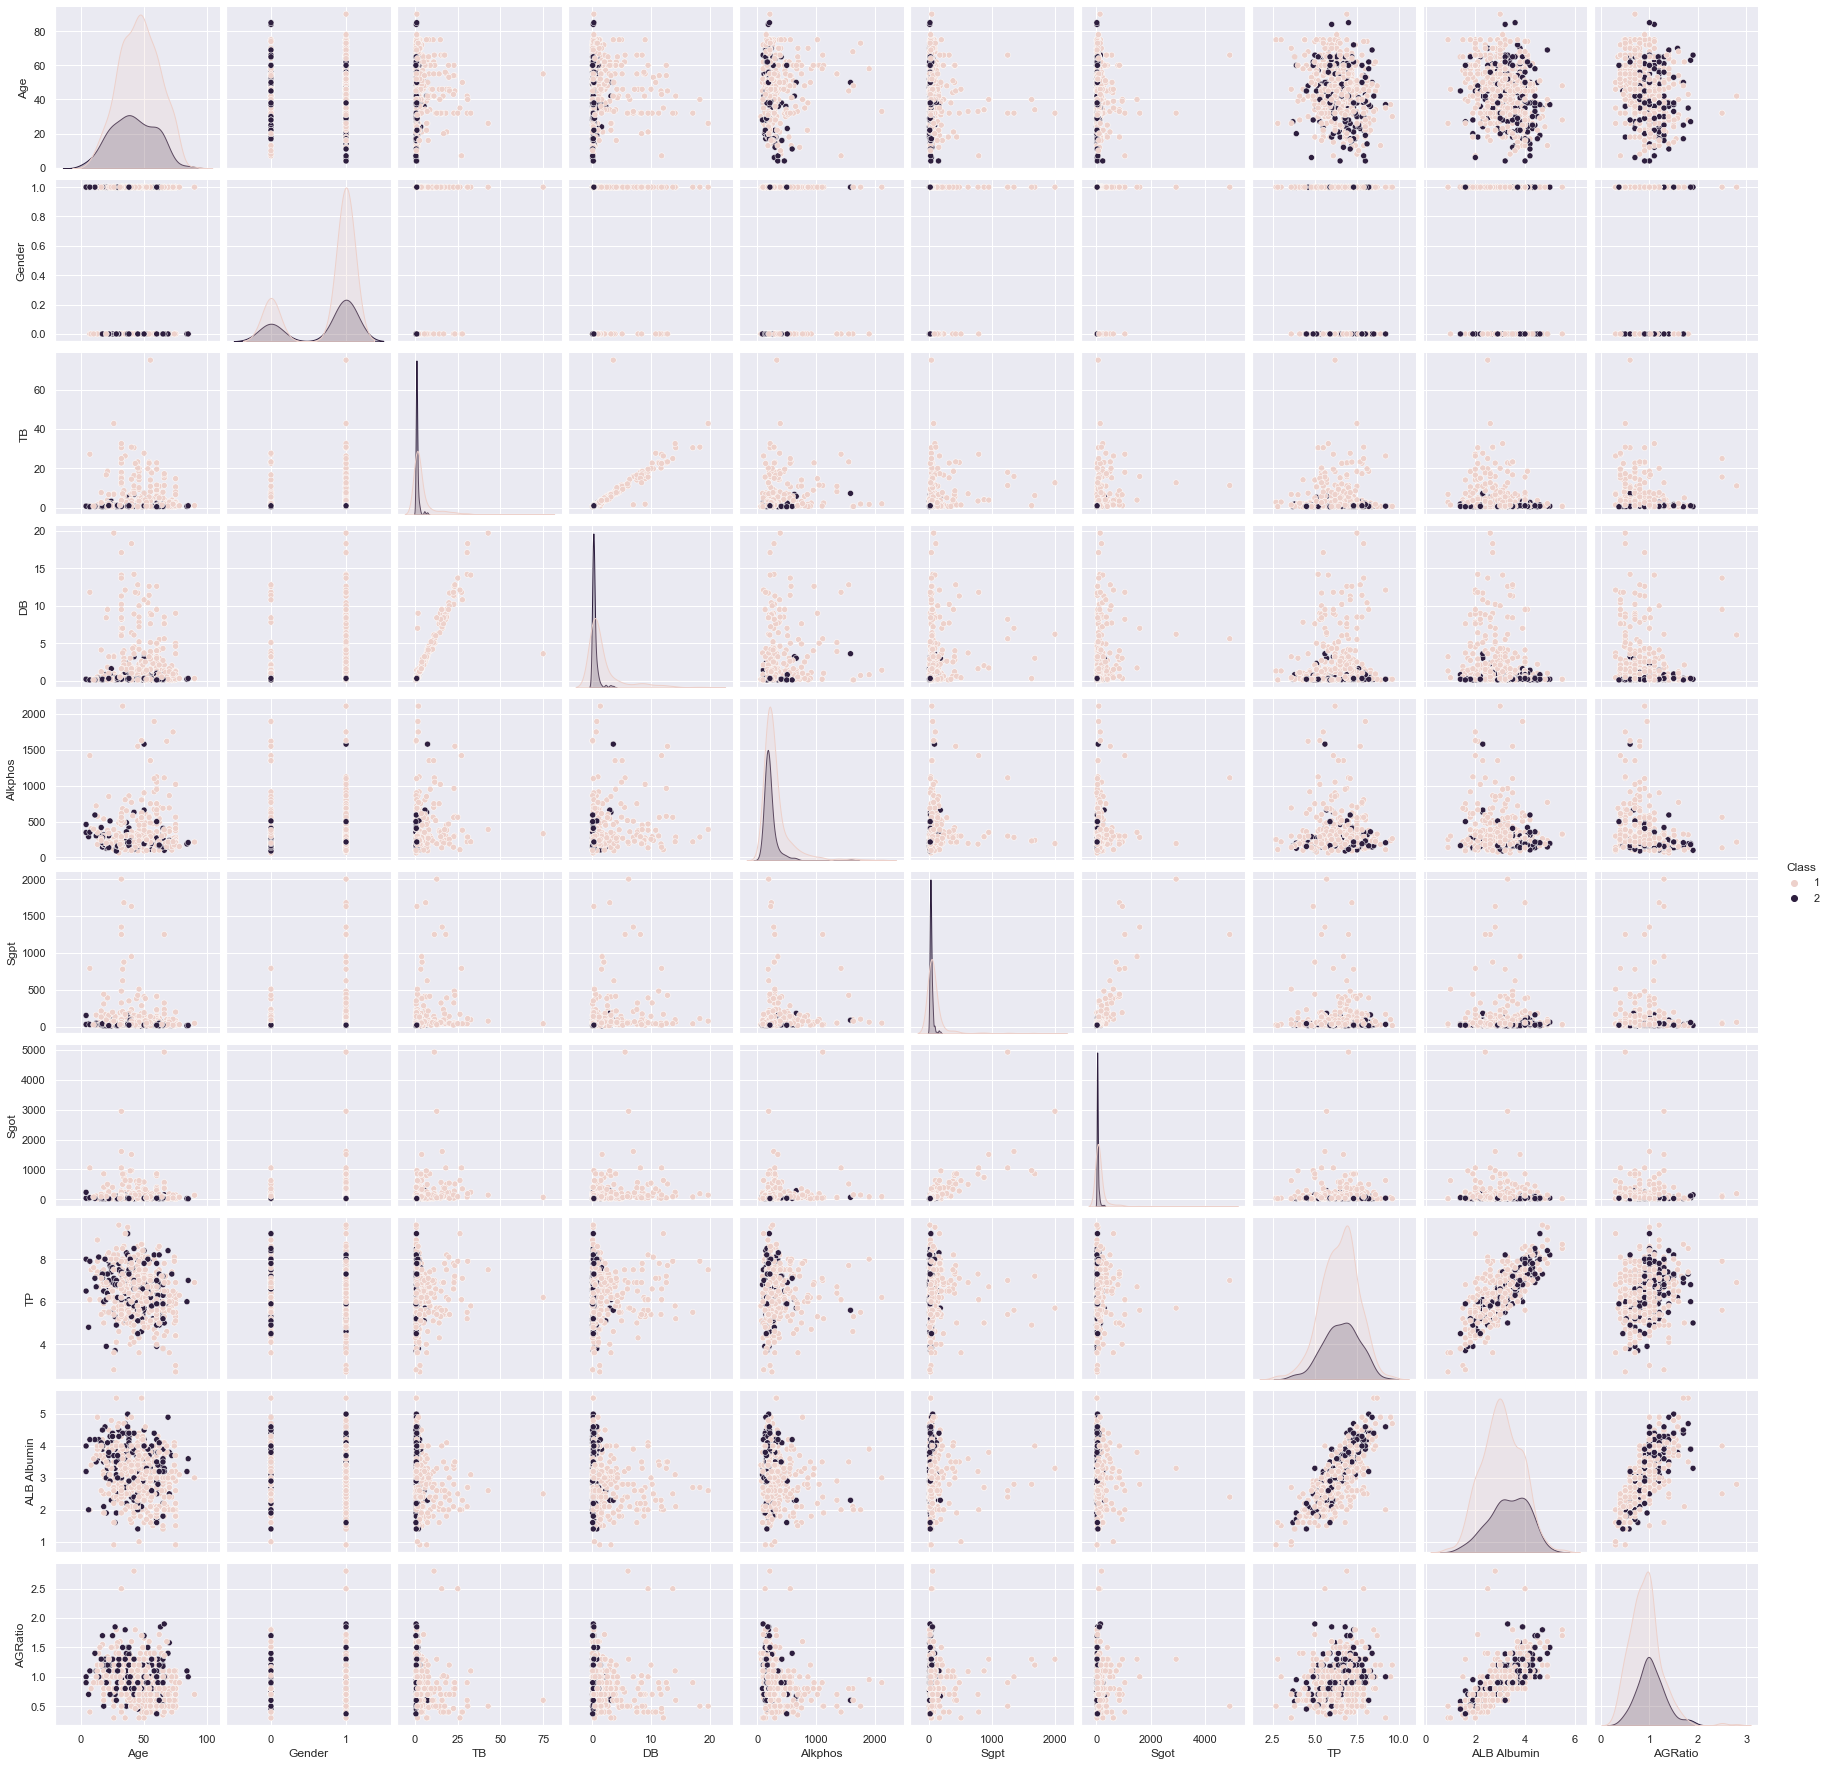

In [262]:
sns.pairplot(df, hue='Class')
plt.show()

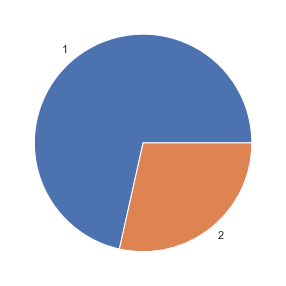

In [263]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [264]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,579.0,44.782383,16.221786,4.0,33.0,45.00,58.0,90.0
Gender,579.0,0.758204,0.428542,0.0,1.0,1.00,1.0,1.0
TB,579.0,3.315371,6.227716,0.4,0.8,1.00,2.6,75.0
DB,579.0,1.494128,2.816499,0.1,0.2,0.30,1.3,19.7
Alkphos,579.0,291.366149,243.561863,63.0,175.5,208.00,298.0,2110.0
Sgpt,579.0,81.126079,183.182845,10.0,23.0,35.00,61.0,2000.0
Sgot,579.0,110.414508,289.850034,10.0,25.0,42.00,87.0,4929.0
TP,579.0,6.481693,1.084641,2.7,5.8,6.60,7.2,9.6
ALB Albumin,579.0,3.138515,0.794435,0.9,2.6,3.10,3.8,5.5
AGRatio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


#### Standardize the Data

In [265]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,579.0,6.442745e-17,1.000865,-2.516224,-0.726959,0.013427,0.815511,2.789873
Gender,579.0,4.908758e-17,1.000865,-1.770795,0.564718,0.564718,0.564718,0.564718
TB,579.0,1.840784e-17,1.000865,-0.468533,-0.404249,-0.372106,-0.114968,11.520533
DB,579.0,1.840784e-17,1.000865,-0.495414,-0.459878,-0.424343,-0.068985,6.469598
Alkphos,579.0,6.135948e-18,1.000865,-0.938421,-0.476127,-0.342575,0.027260,7.473282
Sgpt,579.0,3.681569e-17,1.000865,-0.388615,-0.317586,-0.252021,-0.109964,10.484241
Sgot,579.0,6.135948e-18,1.000865,-0.346736,-0.294940,-0.236238,-0.080851,16.638784
TP,579.0,9.694797e-16,1.000865,-3.489599,-0.629039,0.109170,0.662826,2.877453
ALB Albumin,579.0,1.227190e-17,1.000865,-2.820182,-0.678445,-0.048523,0.833369,2.975106
AGRatio,579.0,-1.196510e-16,1.000865,-2.026406,-0.773729,-0.053439,0.478949,5.802829


#### Observations and Variables

In [266]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

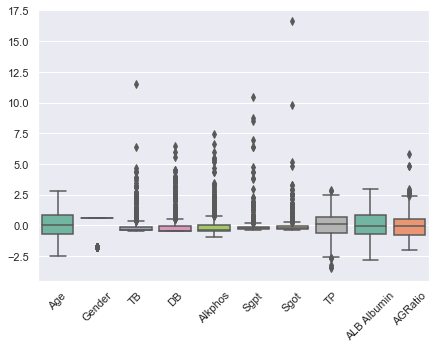

In [267]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

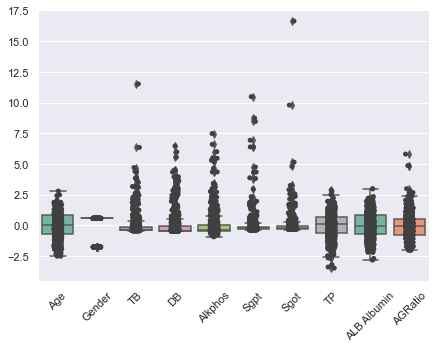

In [268]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

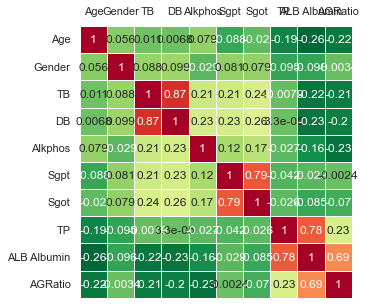

In [269]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [270]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [271]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.812187,-0.744697,-0.152303,1.357467,0.218997,-1.594133,-0.055860
1,1.625507,0.647764,-1.695794,0.387531,1.690236,0.335607,-0.026669
2,0.830728,0.278674,-1.020958,-0.094803,1.348165,-0.067957,0.148900
3,-0.728828,-0.403720,0.021041,-0.550468,0.873863,-0.359676,-0.197123
4,1.001069,-1.223813,-0.449995,-0.122988,1.313085,-0.756422,-1.631428
...,...,...,...,...,...,...,...
574,1.497483,-2.316929,0.362328,0.445108,0.762178,0.696618,-0.791643
575,-0.797233,-0.408947,0.464465,-0.945112,-0.324572,0.079239,0.115328
576,-0.467043,-0.458205,0.307763,-0.464576,0.551128,0.018267,0.012094
577,-0.891625,0.144760,0.013983,-0.616085,-0.341927,0.606220,-0.398725


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'7 Principal Components explain [98.18%] of the variance'}, xlabel='PC1 (27.7% expl.var)', ylabel='PC2 (20.2% expl.var)'>)

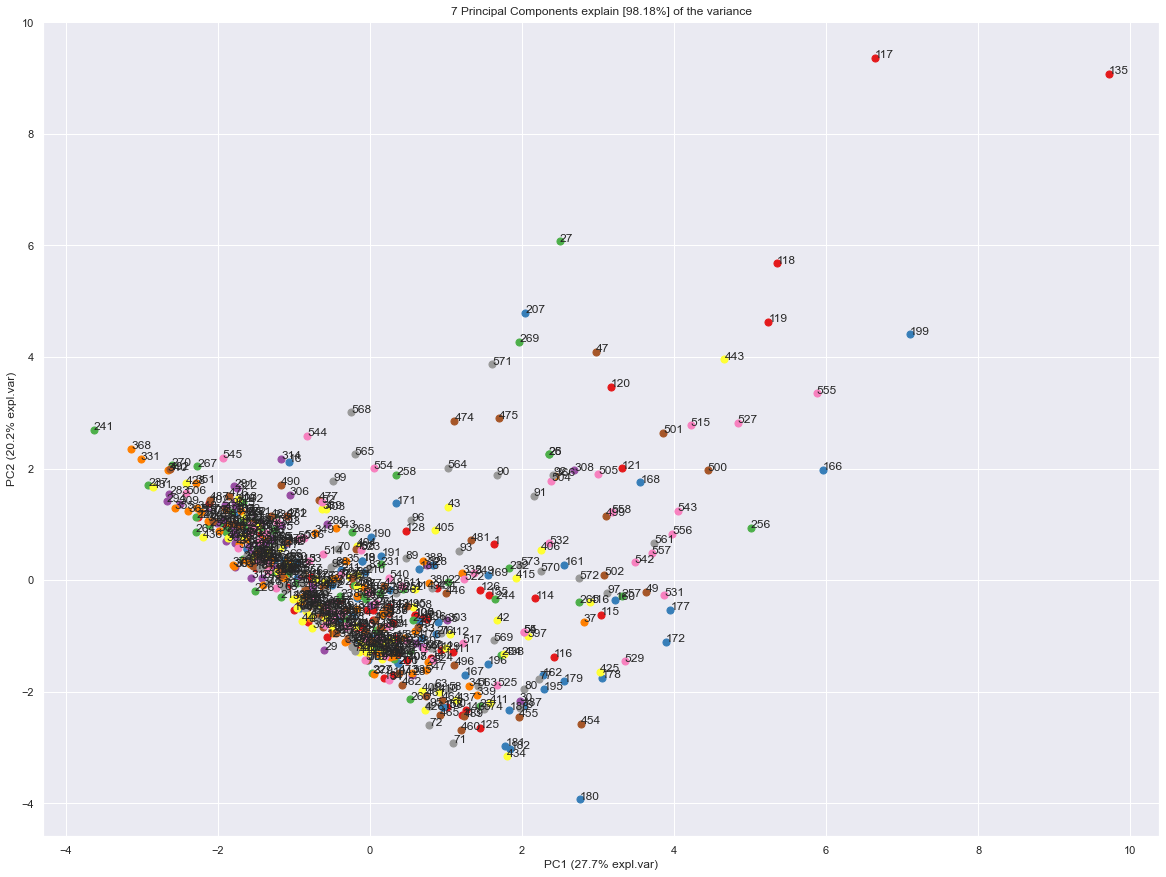

In [272]:
model.scatter(label=True, legend=False)

Eigenvectors

In [273]:
A = out['loadings'].T

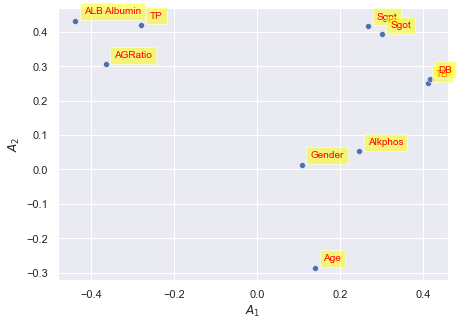

In [274]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

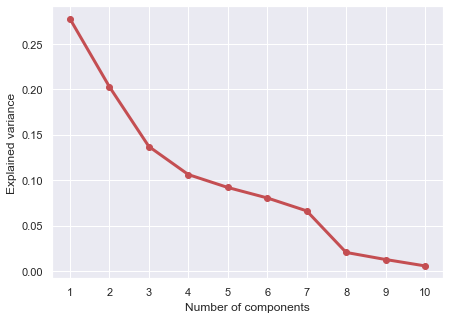

In [275]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

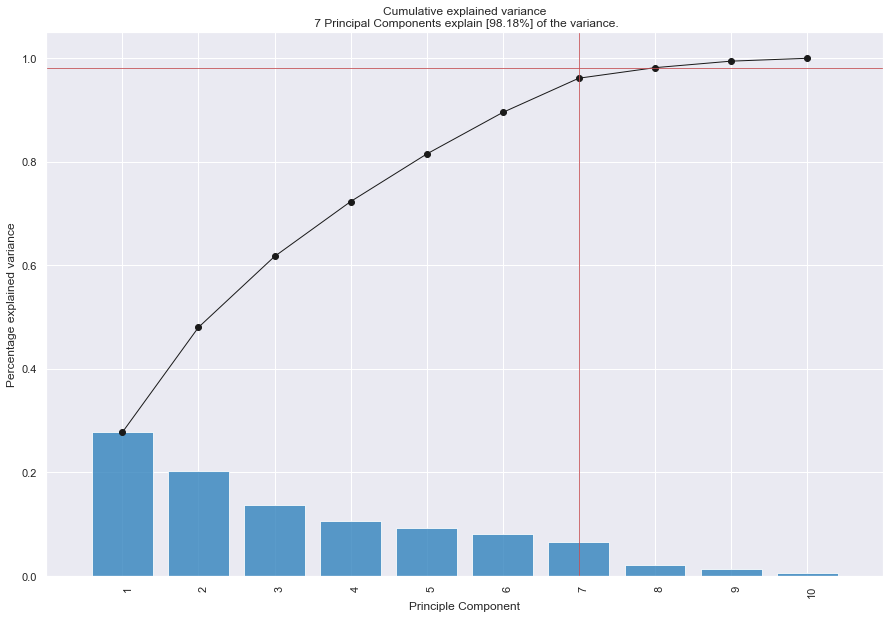

<Figure size 504x360 with 0 Axes>

In [276]:
model.plot();